# Detecting Cracks In Building Using Deep Learning---

## Introduction


We will build an image classifier using the VGG16 pre-trained model in keras, which will identify cracks in images.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">  

1. <a href="#item41">Download Data </a><br>
2. <a href="#item42">Building the model</a><br>
3. <a href="#item43">Testing the model</a>  <br>
4. <a href="#item44">Making Predictions</a>  <br>
    
</div>

<a id="item41"></a>

## Download Data

In [4]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2020-08-01 09:14:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

100%[======================================>] 261,483,817 42.7MB/s   in 6.4s   

2020-08-01 09:14:37 (39.0 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [ ]:
!unzip concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Building the model

In this part, we will design a classifier using the VGG16 pre-trained model. We can import the model <code>VGG16</code> from <code>keras.applications</code>.

Import libraries, modules, and packages we will need. 

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

Use a batch size of 100 images for both training and validation.

In [3]:
num_classes = 2
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.

In [4]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [5]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [6]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


Create a sequential model using Keras. Add VGG16 model to it and dense layer.

In [7]:
model = Sequential()

In [8]:
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.layers[0].trainable = False

Compile the mode using the adam optimizer and the categorical_crossentropy loss function.

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model on the augmented data using the ImageDataGenerators.

In [11]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 1

In [18]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/1
301/301 [==============================] - 6905s 23s/step - loss: 0.1107 - acc: 0.9596 - val_loss: 0.0271 - val_acc: 0.9946


In [19]:
model.save('classifier_vgg16_model')

<a id="item43"></a>

## Testing the model

Load your saved model. 

In [12]:
from keras.models import load_model
model_vgg = load_model('classifier_vgg16_model')

Instructions for updating:
Use tf.cast instead.


/opt/conda/envs/Python36/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, we only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.

In [13]:
batch_size_test = 100
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_test,
    class_mode='categorical',
    shuffle=False)

Found 500 images belonging to 2 classes.


Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. Then print the performance of the classifier using the VGG16 pre-trained model.

In [14]:
steps_train = len(test_generator)

score_vgg = model_vgg.evaluate_generator(test_generator,steps=steps_train)
print("Accuracy using vgg = ",score_vgg[1])

Accuracy using vgg =  0.9960000038146972


<a id="item44"></a>

## Making Predictions

We will predict whether the images in the test data are images of cracked concrete or not. We will use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument.

In [15]:
pred_vgg = model_vgg.predict_generator(test_generator,steps=steps_train)

In [22]:
print("Predictions using Vgg :\n")
for i in range(5):
    if pred_vgg[i][1]>0.5:
        print('\tCracked')
    else:
        print('\tNot Cracked')

Predictions using Vgg :

	Not Cracked
	Not Cracked
	Not Cracked
	Not Cracked
	Not Cracked


For visualising the results we will have to plot the images

In [17]:
import numpy as np
import matplotlib.pyplot as plt

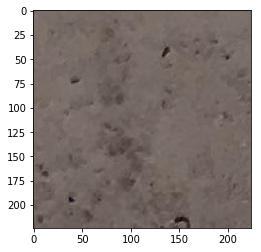

In [18]:
image_data = test_generator[0][0][0].astype(np.uint8)
plt.imshow(image_data)

In [20]:
if pred_vgg[0][1]>0.5:
    print('\tCracked')
else:
    print('\tNot Cracked')

	Not Cracked


## Thanks for reading!